In [22]:
import pandas as pd
data_directory = '../../../Data/PriorityPlacesData/'

In [23]:
scot_dz = pd.read_csv(data_directory + 'SG_DataZones_Centroids_2011.csv')
ew_lsoa = pd.read_csv(data_directory + 'Lower_layer_Super_Output_Areas_(December_2011)_Population_Weighted_Centroids_WGS.csv')
ni_soa = pd.read_csv(data_directory + 'NI_SOA_centroids.csv')
pp_data = pd.read_csv(data_directory + 'priority_places_for_food_oct22.csv')

In [24]:
pp_data = pp_data.merge(ew_lsoa, left_on='geo_code', right_on='lsoa11cd', how='left')

In [25]:
pp_data = pp_data.merge(scot_dz, left_on='geo_code', right_on='DataZone', how='left')

In [26]:
pp_data = pp_data.merge(ni_soa, left_on='geo_code', right_on='SOA_CODE', how='left')

In [27]:
pp_data.columns

Index(['geo_code', 'domain_supermarket_proximity',
       'domain_supermarket_accessibility', 'domain_ecommerce_access',
       'domain_socio_demographic', 'domain_nonsupermarket_proximity',
       'domain_food_for_families', 'domain_fuel_poverty', 'country',
       'country_denominator', 'combined',
       'pp_dec_domain_supermarket_proximity',
       'pp_dec_domain_supermarket_accessibility',
       'pp_dec_domain_ecommerce_access', 'pp_dec_domain_socio_demographic',
       'pp_dec_domain_nonsupermarket_proximity',
       'pp_dec_domain_food_for_families', 'pp_dec_domain_fuel_poverty',
       'pp_dec_combined', 'longitude_x', 'latitude_x', 'objectid', 'lsoa11cd',
       'lsoa11nm', 'DataZone', 'Name', 'TotPop2011', 'ResPop2011', 'HHCnt2011',
       'Easting', 'Northing', 'geometry_x', 'longitude_y', 'latitude_y',
       'Unnamed: 0', 'SOA_CODE', 'SOA_LABEL', 'geometry_y', 'lon', 'lat'],
      dtype='object')

In [29]:
pp_data['geo_label'] = pp_data['lsoa11nm'].fillna(pp_data['Name']).fillna(pp_data['SOA_LABEL'])

In [30]:
pp_data['longitude'] = pp_data['longitude_x'].fillna(pp_data['longitude_y'])
pp_data['latitude'] = pp_data['latitude_x'].fillna(pp_data['latitude_y'])
pp_data['longitude'] = pp_data['longitude'].fillna(pp_data['lon'])
pp_data['latitude'] = pp_data['latitude'].fillna(pp_data['lat'])

In [32]:
pp_data[['geo_code', 'geo_label', 'longitude', 'latitude'] + pp_data.columns[pp_data.columns.str.startswith('pp_dec_domain')].tolist() + ['pp_dec_combined']]

,geo_code,geo_label,longitude,latitude,pp_dec_domain_supermarket_proximity,pp_dec_domain_supermarket_accessibility,pp_dec_domain_ecommerce_access,pp_dec_domain_socio_demographic,pp_dec_domain_nonsupermarket_proximity,pp_dec_domain_food_for_families,pp_dec_domain_fuel_poverty,pp_dec_combined
0,E01003513,Newham 035D,0.045915,51.513348,6,9,10,4,7,4,5,7
1,E01003630,Newham 021C,0.013900,51.533718,2,7,8,1,9,6,2,4
2,E01003617,Newham 012B,0.001566,51.545061,10,9,10,1,10,4,3,10
3,E01003497,Newham 034A,0.008449,51.520488,8,7,8,2,7,6,1,4
4,E01003499,Newham 030A,0.021817,51.523869,10,10,1,1,9,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
42613,S01012412,North Mainland - 03,-1.449147,60.487709,1,1,3,8,1,10,2,7
42614,S01012413,North and East Isles - 01,-1.076407,60.598739,1,1,3,7,1,10,4,7
42615,S01012414,North and East Isles - 02,-0.860016,60.757838,1,1,2,6,1,10,4,6
42616,S01012415,North and East Isles - 03,-1.019186,60.344683,1,1,3,9,2,10,4,7


In [35]:
pp_data = pp_data[['geo_code', 'geo_label', 'longitude', 'latitude'] + pp_data.columns[pp_data.columns.str.startswith('pp_dec_domain')].tolist() + ['pp_dec_combined']]

In [36]:
pp_data.loc[:, pp_data.columns[pp_data.columns.str.startswith('pp_dec_domain')].tolist() + ['pp_dec_combined']] = pp_data[pp_data.columns[pp_data.columns.str.startswith('pp_dec_domain')].tolist() + ['pp_dec_combined']].astype(int)

<AxesSubplot: >

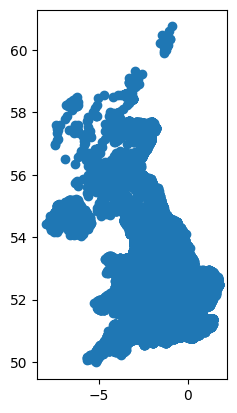

In [37]:
import geopandas as gpd

gpd.GeoDataFrame(pp_data, geometry = gpd.points_from_xy(pp_data['longitude'], pp_data['latitude']), crs=4326).plot()

In [38]:
pp_data.to_csv(data_directory + 'priority_places_Oct2022_decile_domains_WGS.csv')